In [1]:
#Notebook for Data Analysis

#Notebooks for data exploration and cleanup
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress 
import warnings

warnings.filterwarnings("ignore")

#For the x-axis in charts
years = ["2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]

<h1>Analysis - Substance Abuse Treatment</h1>

The hypothesis tested is that there was no significant difference between Colorado substance abuse treatments for marijuana and the rest of the country.  

In [2]:
# Load data files generated in the exploration and cleanup phase.
colorado_data = pd.read_csv("Data/colorado_use_data.csv", index_col=0)
us_data = pd.read_csv("Data/US_full_use_data.csv", index_col=0)

In [3]:
us_data.head()

,ADMYR,SUB1,count_primary,count_secondary,count_tertiary
0,2005,1,6518,195516,315073
1,2005,2,179564,59552,18269
2,2005,3,64962,40607,14117
3,2005,4,69677,60804,21010
4,2005,5,22304,3427,1575


In [4]:
# sum the counts columns to arrive at a total_count for both datasets
colorado_data['count_total'] = colorado_data['count_primary'] +  colorado_data['count_secondary'] + colorado_data['count_tertiary']
us_data['count_total'] = us_data['count_primary'] +  us_data['count_secondary'] + us_data['count_tertiary']

# create percent_adm as total admissions for substance divided by the total by year

# need total per year
colorado_year_total = pd.DataFrame(colorado_data.groupby(['ADMYR'])['count_total'].sum())
us_year_total = pd.DataFrame(us_data.groupby(['ADMYR'])['count_total'].sum())
colorado_year_total.rename(columns={"count_total": "year_total"},inplace=True)
us_year_total.rename(columns={"count_total": "year_total"},inplace=True)

In [5]:
# create new percentage field using the above data to show the percentage of that year's admissions for each substance
colorado_data = colorado_data.merge(colorado_year_total, left_on='ADMYR', right_on='ADMYR', how='outer', validate='many_to_one')
us_data = us_data.merge(us_year_total, left_on='ADMYR', right_on='ADMYR', how='outer', validate='many_to_one')

colorado_data['percent_total'] = (colorado_data['count_total']/colorado_data['year_total']) * 100
us_data['percent_total'] = (us_data['count_total']/us_data['year_total']) * 100

In [6]:
# #SUB1, SUB2, and SUB3 - change numeric to text
# colorado_data.loc[colorado_data['SUB1'] == 1, ['SUB1']] = 'None' 
# colorado_data.loc[colorado_data['SUB1'] == 2, ['SUB1']] = 'Alcohol' 
# colorado_data.loc[colorado_data['SUB1'] == 3, ['SUB1']] = 'Cocaine/crack' 
# colorado_data.loc[colorado_data['SUB1'] == 4, ['SUB1']] = 'Marijuana/hashish' 
# colorado_data.loc[colorado_data['SUB1'] == 5, ['SUB1']] = 'Heroin' 
# colorado_data.loc[colorado_data['SUB1'] == 6, ['SUB1']] = 'Non-prescription methadone' 
# colorado_data.loc[colorado_data['SUB1'] == 7, ['SUB1']] = 'Other opiates/synthetics' 
# colorado_data.loc[colorado_data['SUB1'] == 8, ['SUB1']] = 'PCP' 
# colorado_data.loc[colorado_data['SUB1'] == 9, ['SUB1']] = 'Other hallucinogens' 
# colorado_data.loc[colorado_data['SUB1'] == 10, ['SUB1']] = 'Methamphetamine' 
# colorado_data.loc[colorado_data['SUB1'] == 11, ['SUB1']] = 'Other amphetamines' 
# colorado_data.loc[colorado_data['SUB1'] == 12, ['SUB1']] = 'Other stimulants' 
# colorado_data.loc[colorado_data['SUB1'] == 13, ['SUB1']] = 'Benzodiazepines' 
# colorado_data.loc[colorado_data['SUB1'] == 14, ['SUB1']] = 'Other non-benzo tranquilizers' 
# colorado_data.loc[colorado_data['SUB1'] == 15, ['SUB1']] = 'Barbiturates' 
# colorado_data.loc[colorado_data['SUB1'] == 16, ['SUB1']] = 'Other non-barb. sedatives/hypnotics' 
# colorado_data.loc[colorado_data['SUB1'] == 17, ['SUB1']] = 'Inhalants' 
# colorado_data.loc[colorado_data['SUB1'] == 18, ['SUB1']] = 'OTC medications' 
# colorado_data.loc[colorado_data['SUB1'] == 19, ['SUB1']] = 'Other' 
# us_data.loc[us_data['SUB1'] == 1, ['SUB1']] = 'None' 
# us_data.loc[us_data['SUB1'] == 2, ['SUB1']] = 'Alcohol' 
# us_data.loc[us_data['SUB1'] == 3, ['SUB1']] = 'Cocaine/crack' 
# us_data.loc[us_data['SUB1'] == 4, ['SUB1']] = 'Marijuana/hashish' 
# us_data.loc[us_data['SUB1'] == 5, ['SUB1']] = 'Heroin' 
# us_data.loc[us_data['SUB1'] == 6, ['SUB1']] = 'Non-prescription methadone' 
# us_data.loc[us_data['SUB1'] == 7, ['SUB1']] = 'Other opiates/synthetics' 
# us_data.loc[us_data['SUB1'] == 8, ['SUB1']] = 'PCP' 
# us_data.loc[us_data['SUB1'] == 9, ['SUB1']] = 'Other hallucinogens' 
# us_data.loc[us_data['SUB1'] == 10, ['SUB1']] = 'Methamphetamine' 
# us_data.loc[us_data['SUB1'] == 11, ['SUB1']] = 'Other amphetamines' 
# us_data.loc[us_data['SUB1'] == 12, ['SUB1']] = 'Other stimulants' 
# us_data.loc[us_data['SUB1'] == 13, ['SUB1']] = 'Benzodiazepines' 
# us_data.loc[us_data['SUB1'] == 14, ['SUB1']] = 'Other non-benzo tranquilizers' 
# us_data.loc[us_data['SUB1'] == 15, ['SUB1']] = 'Barbiturates' 
# us_data.loc[us_data['SUB1'] == 16, ['SUB1']] = 'Other non-barb. sedatives/hypnotics' 
# us_data.loc[us_data['SUB1'] == 17, ['SUB1']] = 'Inhalants' 
# us_data.loc[us_data['SUB1'] == 18, ['SUB1']] = 'OTC medications' 
# us_data.loc[us_data['SUB1'] == 19, ['SUB1']] = 'Other' 

In [7]:
# Create multiline plot showing different substance abuse
# Pull Marijuana data only
colorado_marijuana = colorado_data.loc[colorado_data['SUB1'] == 4]
us_marijuana = us_data.loc[us_data['SUB1'] == 4]

# create lists for plotting
colorado_list = colorado_marijuana['percent_total'].to_list()
us_list = us_marijuana['percent_total'].to_list()

colorado_num = colorado_marijuana['count_total'].to_list()
us_num = us_marijuana['count_total'].to_list()

In [8]:
# Set x-axis
x_axis = np.arange(2005,2019, 1)

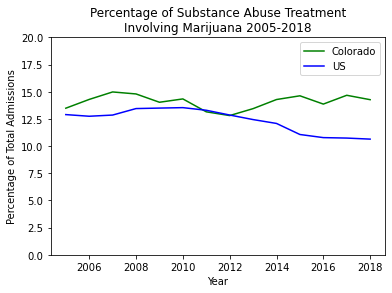

In [30]:
# Create percentage plot
colorado, = plt.plot(x_axis, colorado_list, 'green', label="Colorado")
us, = plt.plot(x_axis, us_list, 'blue', label="US")
# add styling
plt.title("Percentage of Substance Abuse Treatment\nInvolving Marijuana 2005-2018")
plt.xlabel("Year")
plt.ylabel("Percentage of Total Admissions")
plt.ylim(0,20)
plt.legend(handles=[colorado, us], loc="best")
plt.savefig("Output/percentage_marijuana_sub_abuse_admissions")
plt.show()

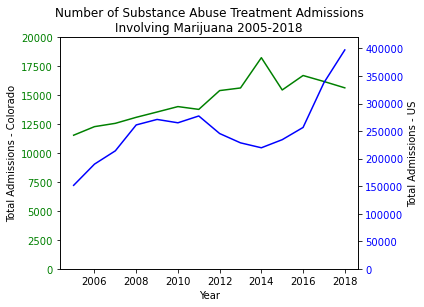

In [34]:
# Create total_count plot
#colorado_count, = plt.plot(x_axis, colorado_num, 'green', label="Colorado")
#us_count, = plt.plot(x_axis, us_num, 'blue', label="US")

# Since the numbers are vastly different for Colorado and the entire U.S., we need a two-scale plot that will show the 
# data more accurately.
fig, ax1 = plt.subplots()
ax1.set_ylabel('Total Admissions - Colorado')
ax1.plot(x_axis, colorado_num, 'green', label='Colorado')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_xlabel('Year')
ax1.set_ylim(0,20000)
         
ax2 = ax1.twinx() #instantiate a second axis that shared the same x-axis
ax2.set_ylabel('Total Admissions - US')
ax2.plot(x_axis, us_num, 'blue', label='US')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_ylim(0,420000)
         
fig.tight_layout()
plt.title("Number of Substance Abuse Treatment Admissions\nInvolving Marijuana 2005-2018")

plt.savefig("Output/totNumber_marijuana_sub_abuse_admissions.png", bbox_inches='tight')
plt.show()


